In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# sns.set_theme(style="white", context="talk")
# sns.set_theme()
#sns.set_theme(style="whitegrid", font_scale=1.5)

sns.set_theme(style="whitegrid", palette="pastel")

# **Age, Gender, Education, and Experience**

Q1. Age
Q2. Gender
Q3. Country
Q4. Level of education
Q5. Title of job
Q6. Years of programming
Q7. Programming language
Q8. Programming language recommended
Q15. Machine learning experience years
Q17. ML algorithms
Q20. Industries
Q21. Size of company
Q22. Size of data science in the company
Q23. Machine learnings into business
Q24. Activities
Q25. Compensation
Q41. Primary tool
Q42. Media sources for DS topics

Kaggle users have created great notebooks including gorgeous visualization and thorough analysis. I have been curious about who are the people publishing these nice notebooks. This notebook shows their ages, genders, education levels, titles and experience from 2021 Kaggle survey. Actually my curiousity started from the thought; I want to feel that I am not an odd person here. Maybe there are some people like me. This analysis could help to answer my curiousity. 

In [2]:
# Read the input file and select some columns

Questions = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")

df = Questions.loc[1:][['Q1','Q2','Q3','Q4','Q5','Q6','Q15','Q25']]
#df.shape


# Clease data and rename columns

df.drop(df[df["Q4"]=='I prefer not to answer'].index, inplace=True)
df.drop(df[df["Q2"].isin(['Nonbinary', 'Prefer not to say', 'Prefer to self-describe'])].index, inplace=True)

df['Q4'] = df['Q4'].replace({'Some college/university study without earning a bachelor’s degree': 'Some college/university study'})

df = df.rename(columns={"Q1": "Age", "Q2": "Gender", "Q3": "Country", "Q4": "Education", "Q5": "Title", "Q6": "Programming",
                       "Q15": "ML", "Q25": "Compensation"})

# df.head()

**Age and Gender**

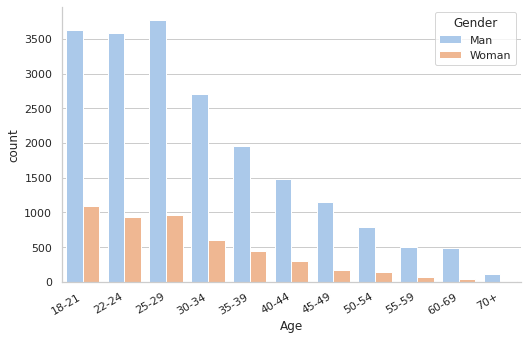

In [3]:
Basic_info = df[["Age", "Gender", "Education"]]

g = sns.catplot(x="Age", hue="Gender", data=Basic_info, kind='count', sharey=False, sharex=False, legend=True, legend_out=False,
                order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'],
               height=5, aspect=1.5)

g.figure.autofmt_xdate()

In [4]:
print("How many women are here?")
age = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']

for a in age:
    per = df[(df['Gender']=='Woman') & (df['Age']==a)].size / df[df['Age']==a].size * 100
    print("Age", a,":", round(per,2),"%")

How many women are here?
Age 18-21 : 23.07 %
Age 22-24 : 20.72 %
Age 25-29 : 20.39 %
Age 30-34 : 18.26 %
Age 35-39 : 18.37 %
Age 40-44 : 16.82 %
Age 45-49 : 12.94 %
Age 50-54 : 14.49 %
Age 55-59 : 12.3 %
Age 60-69 : 6.67 %
Age 70+ : 6.84 %


As we have seen in the previous Kaggle surveys, the result is not surprising. The percentage of woman users is roughly 20%. In older age groups, the number of people decreases and the imbalance between man and woman becomes even worse. Does the level of education affect gender imbalance or age group differences?

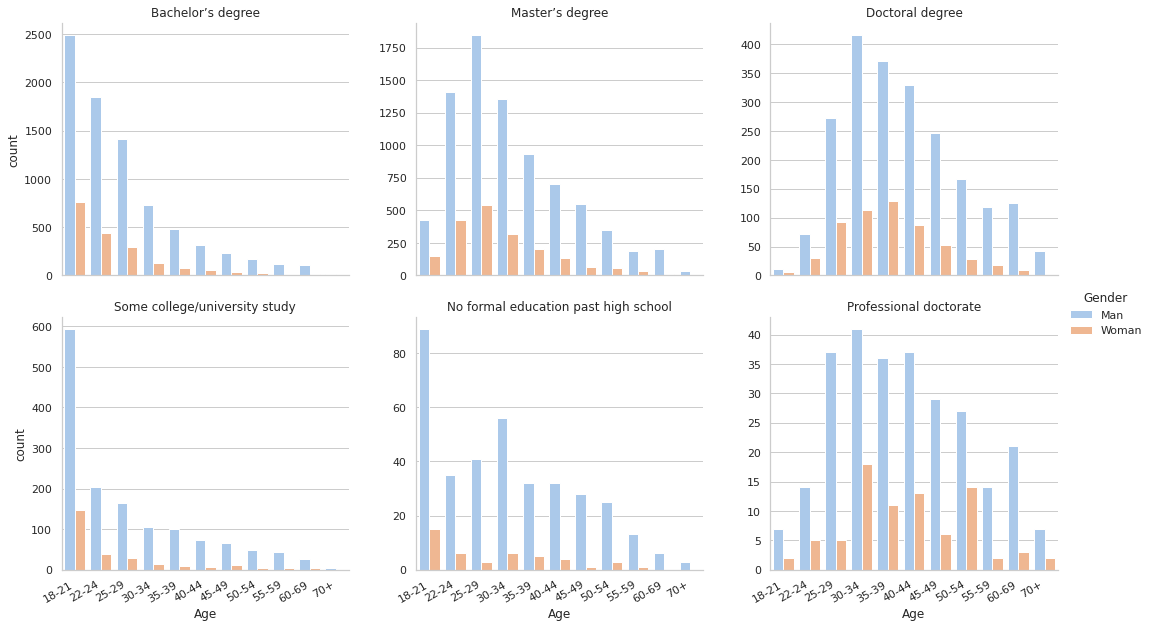

In [5]:
g = sns.catplot(x="Age", hue="Gender", data=Basic_info, col="Education", col_wrap=3, kind='count', sharey=False, sharex=False,
             order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'])
g.figure.autofmt_xdate()
g.set_titles("{col_name}")

In [6]:
print("How many women are here?")
edu = ['Bachelor’s degree', 'Master’s degree', 'Doctoral degree','Some college/university study',
                       'No formal education past high school', 'Professional doctorate']
for a in edu:
    per = df[(df['Gender']=='Woman') & (df['Education']==a)].size / df[df['Education']==a].size * 100
    print(a,":", round(per,2),"%")

How many women are here?
Bachelor’s degree : 18.86 %
Master’s degree : 19.61 %
Doctoral degree : 20.65 %
Some college/university study : 15.74 %
No formal education past high school : 10.89 %
Professional doctorate : 23.08 %


It seems people are active on Kaggle around the time when they achieve their degrees. For Master and Doctoral degrees groups, the peaks of the plots are shifted to older groups. For Doctoral degree and Professional doctorate groups, the percentages of women are a little higher, but still near 20%. I had a question at this point. Do I really need to separate by gender? The imbalance exists for all age groups and there can be a variety of reasons, which are hard to explain from this dataset. Moreover, for each age group, the distributions of men and women are very similar. It may be better to focus less on gender.

**Age and Education**

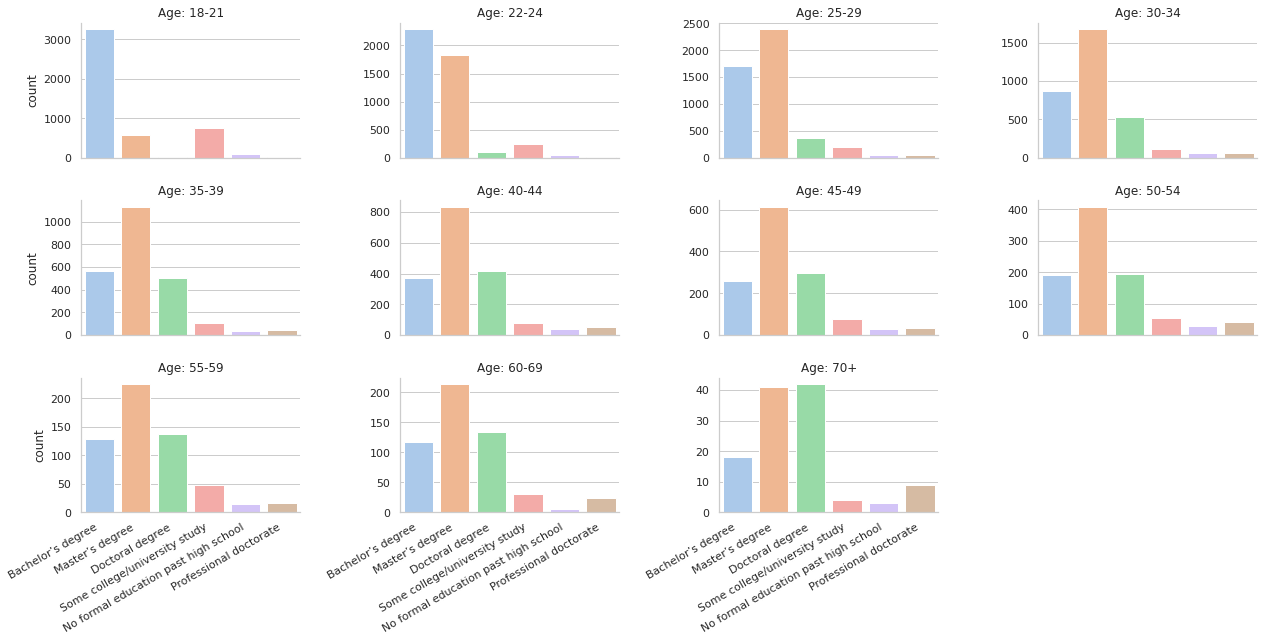

In [7]:
g = sns.catplot(x="Education", data=Basic_info, col="Age", col_wrap=4, kind='count', height=3, aspect=1.5, sharey=False, sharex=True, 
                col_order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'])

g.figure.autofmt_xdate()
g.set_axis_labels("")
g.set_titles("Age: {col_name}")

In all age groups, except the youngest groups (18-24), the Master's degree group has the most people. Will some of the people who are in the youngest age group move to Master's or Doctoral degree groups in several years? If we compare the first (18-21) and second (22-25) groups, we can tell the Master's degree group becomes much taller. I would answer YES for the question. Then, I carefully say Master's degree is the most popular level of education. 

**World vs. United States of America**

Text(0.5, 0.98, 'Worldwide')

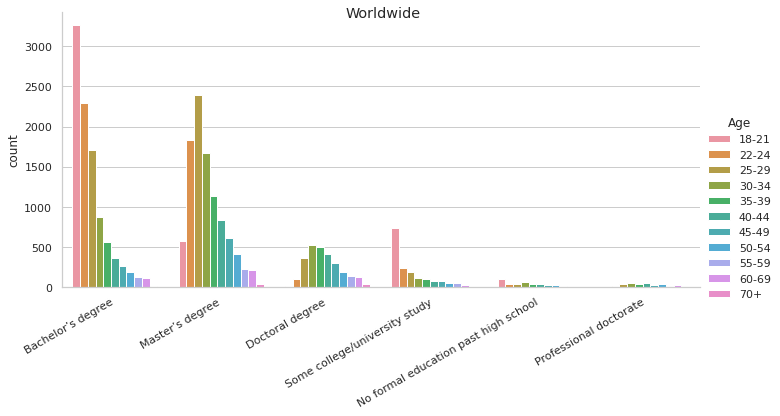

In [8]:
g = sns.catplot(x="Education", hue='Age', data=Basic_info, kind='count', height=5, aspect=2, sharey=False, sharex=True,  
                hue_order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'])

g.figure.autofmt_xdate()
g.set_axis_labels("")
g.figure.suptitle("Worldwide")

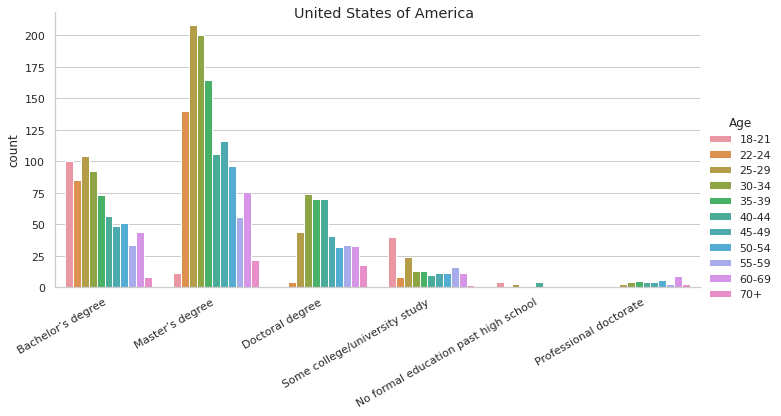

In [9]:
USA = df[df["Country"]=='United States of America'][['Age','Gender','Education']]

g = sns.catplot(x="Education", hue="Age", data=USA, kind='count', height=5, aspect=2, sharey=False, sharex=True,
                hue_order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'],
                order=['Bachelor’s degree', 'Master’s degree', 'Doctoral degree','Some college/university study',
                       'No formal education past high school', 'Professional doctorate'])

g.figure.autofmt_xdate()
g.figure.suptitle("United States of America")
g.set_axis_labels("")

In the entire dataset, the highest group of people is the 18-21 years old group with Bachelor's degree, while in the United States of America, Master's degree is the majority. It seems there are so many young people who are preparing to become data scientists around the world by spending time on Kaggle. Each country may have different cultures and trends. Since in the United States of America, graduate degrees are generally required, it seems that young people pursue a higher degree rather than self-learning on Kaggle to become data scientists.

In [10]:
age_mapping = {"18-21": 1, "22-24": 2, "25-29": 3, "30-34": 4, "35-39": 5, 
              "40-44": 6, "45-49": 7, "50-54": 8, "55-59": 9, "60-69": 10, "70+": 11}
df['Age'] = df['Age'].map(age_mapping)

# gender_mapping = {"Man": 1, "Woman": 2, 'Nonbinary': 3, 'Prefer not to say': 4, 'Prefer to self-describe': 5} 
# df['Gender'] = df['Gender'].map(gender_mapping)

edu_mapping = {'Bachelor’s degree': 1, 'Master’s degree': 2, 'Doctoral degree': 3, 'I prefer not to answer': 4,
               'Some college/university study without earning a bachelor’s degree': 5,
               'No formal education past high school': 6, 'Professional doctorate': 7} 
df['Education'] = df['Education'].map(edu_mapping)

code_mapping = {'< 1 years': 1, '1-3 years': 2, '3-5 years': 3, '5-10 years': 4, '10-20 years': 5,
               '20+ years': 6, 'I have never written code': 0} 
df['Programming'] = df['Programming'].map(code_mapping)

ml_mapping = {'Under 1 year': 1, '1-2 years': 2, '2-3 years': 3, '3-4 years': 4, '4-5 years': 5,
              '5-10 years': 6, '10-20 years': 7, '20 or more years': 8,
              'I do not use machine learning methods': 0} 

df['ML'] = df['ML'].map(ml_mapping)
df['ML'] = df['ML'].fillna(0)

# **Why do people come to Kaggle?**

I have a reason to come to Kaggle. To learn data science without much previous experience. What about other people? Are there more experts or more beginners? Are they focusing on data analysis or machine learning techniques? 

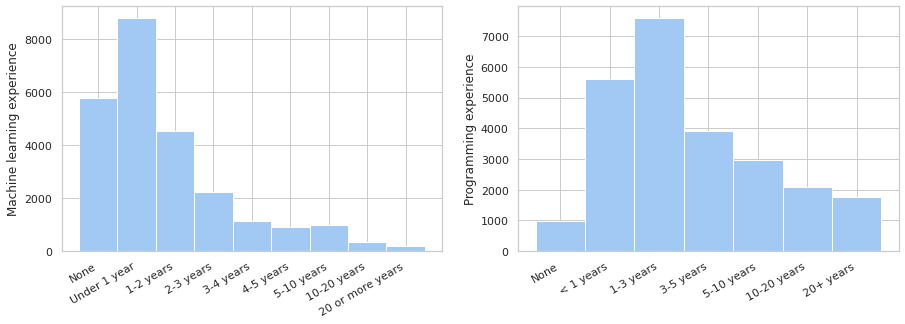

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False, sharex=False)
# fig.suptitle('')


ax[0].hist(x=df['ML'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], align='left')
ax[1].hist(x=df['Programming'], bins=[0, 1, 2, 3, 4, 5, 6, 7], align='left')

ax[0].set_xticks([0,1,2,3,4,5,6,7,8])
ax[0].set_xticklabels(['None', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years',
              '5-10 years', '10-20 years', '20 or more years']) 

ax[1].set_xticks([0,1,2,3,4,5,6])
ax[1].set_xticklabels(['None', '< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years',
               '20+ years'])

ax[0].set_ylabel('Machine learning experience')
ax[1].set_ylabel('Programming experience')

fig.figure.autofmt_xdate()


In [12]:
# df[(df['Programming']>2)].shape[0]/df.shape[0]
# df[(df["Programming"]<4) & (df['Programming']>1)].shape[0]/df.shape[0]

97.8% of people have less than 10 years experience in machine learning while 84.6% of people have less than 10 years programming experience. Actually, 60% of people have no experience or less than 1 year experience, and 90% of people spend less than 3 years on machine learning. Let's just define an expert as a person who has at least 3 years experience. A big portion of Kaggle users are learning/practicing machine learning skills but not at an expert level. 
It seems like most Kaggle users have more programming experience than machine learning. 43% of users have more than 3 years programming experience, who are not beginners. Except for users who do not have any experience, half of users are expert programmers.   

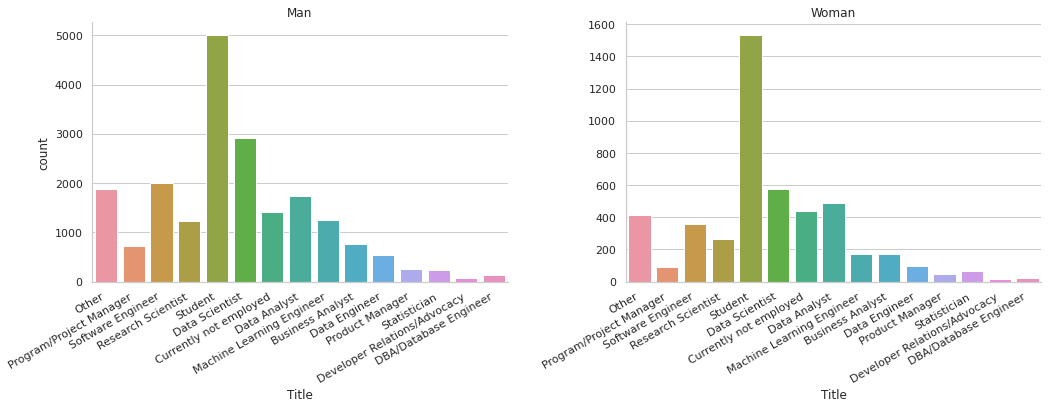

In [13]:
titles = df['Title'].unique()
g=sns.catplot(data=df, x='Title', height=5, aspect=1.5, col='Gender', order=titles, sharey=False, kind='count')

g.figure.autofmt_xdate()
g.set_titles("{col_name}")

The most popular title for both men and women is *Student*. Many students are learning on Kaggle for fun (maybe) and to make themselves more attractive in job markets. A significant number of people declared they are currently unemployed. For the same reason, they may spend time on Kaggle and build strong data techniques. If we plot them for each age group, we can see more.   

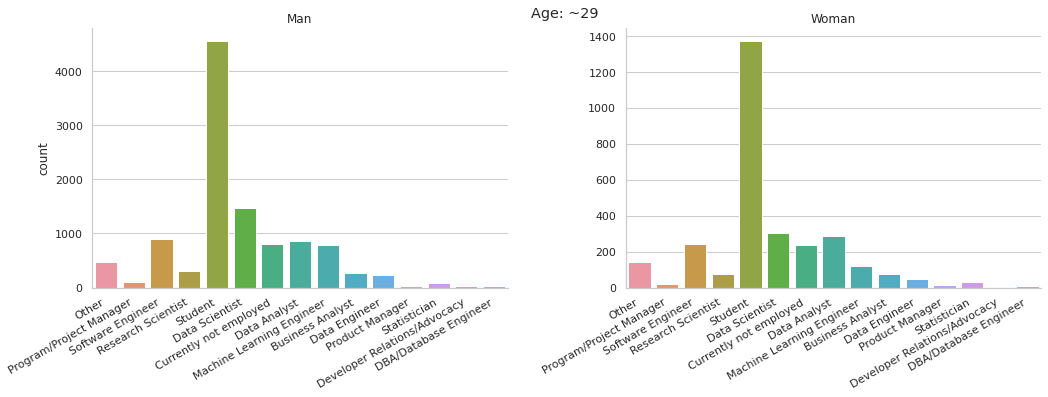

In [14]:
# g=sns.displot(data=df[df['Age'].isin([1,2,3])], x='Title', height=5, aspect=1.5, col='Gender',stat="density", common_norm=False, multiple="dodge")

g=sns.catplot(data=df[df['Age'].isin([1,2,3])], x='Title', height=5, aspect=1.5, col='Gender', order=titles, sharey=False, kind='count')

g.figure.autofmt_xdate()
g.figure.suptitle("Age: ~29")
g.set_axis_labels("")
g.set_titles("{col_name}")

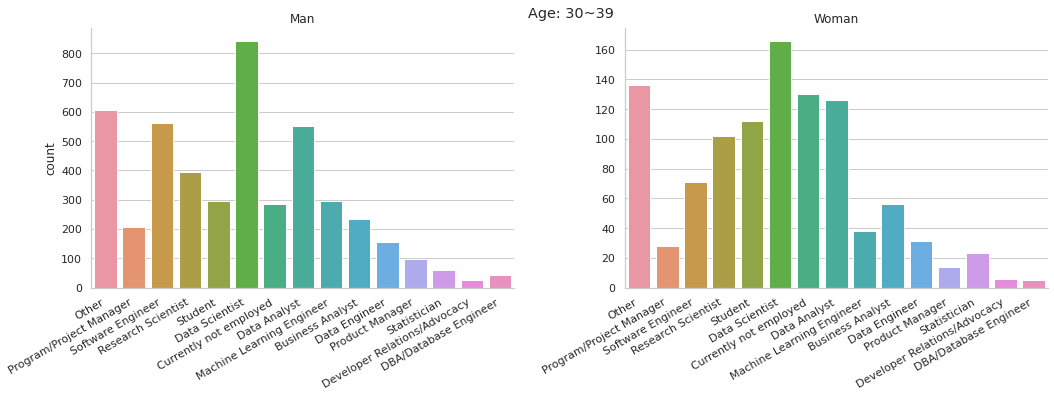

In [15]:
# g=sns.displot(data=df[df['Age'].isin([4,5])], x='Title', height=5, aspect=1.5, col='Gender',stat="density", common_norm=False, multiple="dodge")

g=sns.catplot(data=df[df['Age'].isin([4,5])], x='Title', height=5, aspect=1.5, col='Gender', order=titles, sharey=False, kind='count')

g.figure.autofmt_xdate()
g.figure.suptitle("Age: 30~39")
g.set_axis_labels("")
g.set_titles("{col_name}")

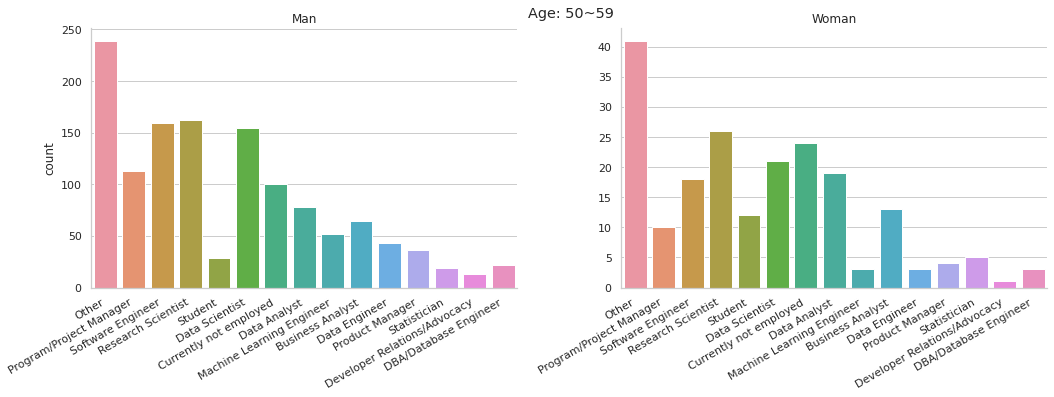

In [16]:
# g=sns.displot(data=df[df['Age'].isin([8,9])], x='Title', height=5, aspect=1.5, col='Gender',stat="density", common_norm=False, multiple="dodge")

g=sns.catplot(data=df[df['Age'].isin([8,9])], x='Title', height=5, aspect=1.5, col='Gender', order=titles, sharey=False, kind='count')

g.figure.autofmt_xdate()
g.figure.suptitle("Age: 50~59")
g.set_axis_labels("")
g.set_titles("{col_name}")

Most users in their 20s are students. Probably they are building their skill sets to get a job. 

For 30s users, the popular job titles are data scientists, data analysts, software engineers, and research scientists. Many lucky people have already arrived for jobs related to data. But for women in their 30s, there are more students and more unemployed than men. I don't want to say women are not qualified enough to get a job or have less chances to get a job. They are still learning new things or polishing their skills by spending time and effort on Kaggle, probably for getting a job. I felt kind of say, but let's move on.  

An interesting thing is that in the 50s user groups, many users' titles are something else than we generally think relating to data. They may want to understand better for new techniques rather than prepare for a new job.

# **Can I become a data scientist?**

Let me tell you about me a little bit. I am a woman, 41 years old, and live in the United States of America. I have a Doctoral degree in Engineering school, had worked for several years in industry and academia, left from my job three years ago for family care. I don't have any formal learning experience in data science, but am learning from Kaggle. I'm telling my story to ask one question: Can I become a data scientist? Is it a realistic dream? I wondered if there are some people like me. If I see some, that will be a bright side for me. 

In [17]:
print("Total number of people: ", df.shape[0])
print("The number of people in USA: ", df[df["Country"]=='United States of America'].shape[0])
print("The number of women in USA: ", df[(df["Country"]=='United States of America') & (df['Gender']=='Woman')].shape[0])

print("The number of women in USA, 35 years old or older: ", 
      df[(df["Country"]=='United States of America') & (df['Gender']=='Woman') & (df['Age']>4)].shape[0])

print("The number of women in USA, 35 years old or older with a Doctoral degree: ", 
      df[(df["Country"]=='United States of America') & (df['Gender']=='Woman')
        & (df['Age']>4)
        & (df['Education']==3)].shape[0])

print("The number of women in USA, 35 years old or older with a Doctoral degree, less than 10 years coding experience, less than 3 years ML: ", 
      df[(df["Country"]=='United States of America') & (df['Gender']=='Woman')
        & (df['Age']>4)
        & (df['Education']==3) & (df['Programming']<5) & (df["ML"]<4)].shape[0])

Total number of people:  24903
The number of people in USA:  2531
The number of women in USA:  596
The number of women in USA, 35 years old or older:  297
The number of women in USA, 35 years old or older with a Doctoral degree:  55
The number of women in USA, 35 years old or older with a Doctoral degree, less than 10 years coding experience, less than 3 years ML:  27


I just turned 40s a year ago, so it may be better to include 35-39 years old women to find people like me. The real reason including the 35-39 group is that only 36 women, older than 40, have a doctoral degree. 

I haven't been a programmer. I was a digital circuit designer, did coding in VHDL, verilog Hardware description language, and a student in Engineering schools for a long time and an educator. I have been coding, of course, I have experience, but haven't focused on coding itself. I know some ML techniques and borrowed them for my research, but haven't been classified as a person working in the ML field.  

I could find 27 people. Yay! Even though there are a small number of people, there are ladies like me!!! I'm very happy to see them. I'm not the only one. I feel that my dream is not totally unrealistic. Good news! Let's look at what they are doing now.


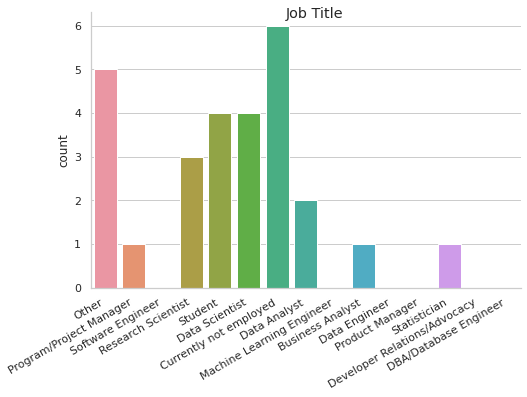

In [18]:
# df[(df["Country"]=='United States of America') & (df['Gender']=='Woman')
#         & (df['Age']>4) & (df['Education']==3) & (df['Programming']<5) & (df["ML"]<4)].groupby('Title')['Title'].count()

data = df[(df["Country"]=='United States of America') & (df['Gender']=='Woman')
        & (df['Age']>4) & (df['Education']==3) & (df['Programming']<5) & (df["ML"]<4)]

g=sns.catplot(data=data, x='Title', height=5, aspect=1.5, order=titles, sharey=False, kind='count')

g.figure.autofmt_xdate()
g.figure.suptitle("Job Title")
g.set_axis_labels("")

Out of 27 women, 10 are Currently not employed or declared as a student. Brave ladies like me!

But what I really want to see is women who are actively working in industry with a little coding/ML experience, only 17 out of 596 women respondents in the USA. I'm not giving up, but I think I shouldn't be too optimistic.

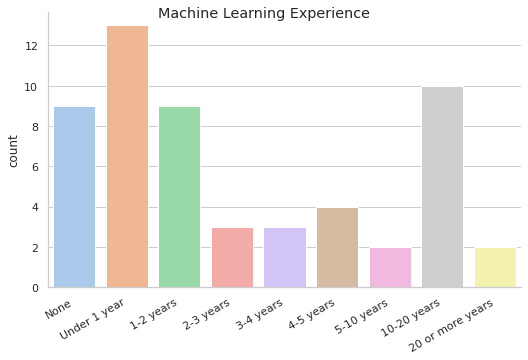

In [19]:
# df[(df["Country"]=='United States of America') & (df['Gender']=='Woman') & (df['Age']>4) & (df['Education']==3)].groupby('ML')['ML'].count()

df_me = df[(df["Country"]=='United States of America') & (df['Gender']=='Woman') & (df['Age']>4) & (df['Education']==3)]

g=sns.catplot(data=df_me, x='ML', height=5, aspect=1.5, order=[0,1,2,3,4,5,6,7,8], sharey=False, kind='count')

g.figure.autofmt_xdate()
g.figure.suptitle("Machine Learning Experience")
g.set_xticklabels(['None', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years',
              '5-10 years', '10-20 years', '20 or more years'])
g.set_axis_labels("")

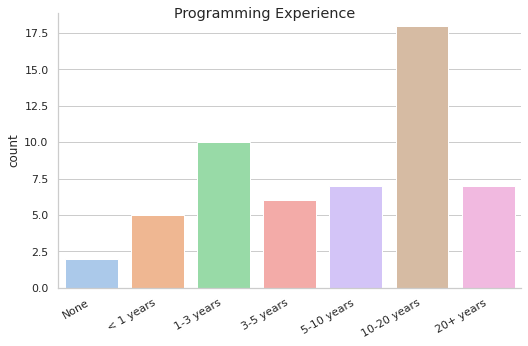

In [20]:
# df[(df["Country"]=='United States of America') & (df['Gender']=='Woman') & (df['Age']>4) & (df['Education']==3)].groupby('Programming')['Programming'].count()

g=sns.catplot(data=df_me, x='Programming', height=5, aspect=1.5, order=[0,1,2,3,4,5,6], sharey=False, kind='count')

g.figure.autofmt_xdate()
g.figure.suptitle("Programming Experience")
g.set_xticklabels(['None', '< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years',
               '20+ years'])
g.set_axis_labels("")


Women users who are older than 35 having a doctorate degree are out there. Not all of them are experts for programming or machine learning. They put their efforts in for self-improvement. 

Success or failure for getting a job depends on how much you are ready for the job. Of course, you need to have required skill sets and prepare for interviews, and I'm sure that there are much more to do. But in a situation when you feel you may not fit even though you really want to be in, if you meet somebody who is in the same situation or who already achieved a success even in the situation, it would definitely encourage you. I'm happy to complete this notebook as a new learner, and also encouraged by seeing some users like me!
